Given a consumer complaint, predict which product is complaint about.

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth',None)
import numpy as np

In [2]:
data=pd.read_csv('/users/rahulkp/downloads/consumer_complaints.csv')
data

/var/folders/wk/sk318yrn7cgdc9qc0pn7_4740000gn/T/ipykernel_43041/1662134432.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/users/rahulkp/downloads/consumer_complaints.csv')


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [4]:
data.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

 In the above data we have to just classify products based on narrative given by customers so, we need 2 column i.e. product and consumer_complaint_narrative

In [5]:
pd.notnull(data['consumer_complaint_narrative']).value_counts()

False    489151
True      66806
Name: consumer_complaint_narrative, dtype: int64

out of 555957 rows only 66806 rows contains data, rest all null values.

In [6]:
text_rows=data['consumer_complaint_narrative'].notnull()

In [7]:
print(list(text_rows.index[text_rows]))

[190126, 190135, 190155, 190207, 190208, 190237, 190238, 190251, 190263, 190264, 190303, 190587, 190710, 191015, 191294, 191335, 191417, 191476, 191477, 191554, 191555, 191588, 191607, 191636, 191732, 191751, 191795, 191840, 191858, 191898, 191920, 191921, 191951, 191976, 191991, 191998, 192008, 192020, 192023, 192044, 192050, 192057, 192058, 192070, 192077, 192083, 192115, 192137, 192148, 192150, 192272, 192326, 192333, 192334, 192336, 192365, 192386, 192396, 192408, 192412, 192416, 192425, 192439, 192442, 192470, 192471, 192472, 192484, 192485, 192492, 192496, 192500, 192521, 192543, 192556, 192560, 192584, 192594, 192624, 192625, 192632, 192664, 193802, 193847, 193848, 193865, 193965, 193999, 194096, 194159, 194250, 194268, 194324, 194371, 194468, 194491, 194507, 194517, 194615, 194683, 194694, 194696, 194787, 194825, 194826, 194835, 194876, 194956, 194966, 194982, 194992, 195000, 195001, 195003, 195012, 195020, 195035, 195043, 195044, 195057, 195065, 195078, 195079, 195113, 195124,

In [8]:
data=data[['product','consumer_complaint_narrative']]
data=data[pd.notnull(data['consumer_complaint_narrative'])]
data

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! \nThey continue to insist I owe them and collection agencies are after me. \nHow can I stop this harassment for a bill I already paid four years ago? \n
190135,Consumer Loan,"Due to inconsistencies in the amount owed that I was told by M & T Bank and the amount that was reported to the credit reporting agencies, I was advised to write a good will letter in order to address the issue and request the negative entry be removed from my credit report all together. I had a vehicle that was stolen and it was declared a total loss by insurance company. The insurance company and the GAP insurancw companypaid the outstanding balance of the loan, but I was told by M & T Bank that there was still a balance due on the loan. In good faith, without having received any proof as to why there was still a balance, I made a partial payment towards the remaining debt. I then sent the goodwill letter still offering to pay the remainder of the debt, but in exchange for the removal of the negative entry on my credit report. At one point, in XXXX 2015, per my credit monitoring agency, it showed a delinquent balance of {$0.00}, but when I checked my credit report again on XXXX XXXX 2015, there was a delinquent balance of {$1400.00}. The monies from the GAP insurance and my insurance company has been paid, M & T Bank says that I still owe {$620.00}, of which {$210.00} has already been paid. I contacted M & T Bank via return receipt mail, but I have not been given the courtesy of a response yet. \n"
190155,Mortgage,"In XX/XX/XXXX my wages that I earned at my job decreased by almost half, by XX/XX/XXXX I knew I was in trouble with my home loan. I began contacting WFB whom my home loan is with, for assitance and options. \nIn early XX/XX/XXXX I began the Loan Modification process with Wells Fargo Bank. I was told that they would not assist me with anything financial on my home loan until I fell 90 days behind, though at the time I started to inquire for assistance from WFB I was only a few weeks behind. So, I began working with a program called XXXX. They approved me for a variety of assistence and reached out to Wells Fargo Bank to determine what they could assist with. Wells Fargo then turned down the assistance from XXXX and finally offered to do a Loan Modification for me. The outcome was totally unknow about what I would be offered in the end by WFB for assistance. Wells Fargo lost my paperwork twice during this process, so it took 2 months from the time I started to the time my paperwork began to be processed for some kind of approval. In XX/XX/XXXX I was in a trial period of 3 months of payments based on a slightly modified amount. Roughly {$75.00} less than what I was paying on my original payment. However, my caseworker with WFB, failed to tell me that since the payments during this time were not the full amount of the original mortgage payment so they were not applied to the loan. I discovered this in XX/XX/XXXX when I was told by a creditor with XXXX that she could n't restore my line of credit because of something to do with my mortgage. I then called and found this out. My caseworker at WFB then told me it was n't her responsibility to tell me this information. I told her that she could have told me that if I could come up with the remaining amount of {$75.00} then the payments would be applied. Instead, she chose to withhold this information and damage my credit even further. Now we are into 5 months ( including the 90 days WFB told me I had to fall behind until they would help me ) without an applied payment to my home loan, going on 6 months. \nMore paperwork was lost in XXXX as the modification was being finalized and my loan modification did n't go through until XX/XX/XXXX. I spoke to a lawyer that is working on a class-action laws

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66806 entries, 190126 to 553096
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   product                       66806 non-null  object
 1   consumer_complaint_narrative  66806 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [10]:
data['product'].unique()

array(['Debt collection', 'Consumer Loan', 'Mortgage', 'Credit card',
       'Credit reporting', 'Student loan', 'Bank account or service',
       'Payday loan', 'Money transfers', 'Other financial service',
       'Prepaid card'], dtype=object)

In [11]:
data['product'].nunique()

11

In [12]:
data['product'].value_counts()

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

In [13]:
# Merging the like wise categories
data['product']=data['product'].replace(['Credit card','Prepaid card'],'Credit card or Prepaid card')
data['product']=data['product'].replace(['Consumer Loan','Student loan','Payday loan'],'Consumer Loan or Student Loan or Payday Loan')
data['product']=data['product'].replace(['Bank account or service','Money transfers','Other financial service'],'Bank account or Money transfers or Other financial service')

In [14]:
data['product'].value_counts()

Debt collection                                               17552
Mortgage                                                      14919
Credit reporting                                              12526
Credit card or Prepaid card                                    8790
Consumer Loan or Student Loan or Payday Loan                   6532
Bank account or Money transfers or Other financial service     6487
Name: product, dtype: int64

In [17]:
data['product'].value_counts()/data.shape[0]

Debt collection                                               0.262731
Mortgage                                                      0.223318
Credit reporting                                              0.187498
Credit card or Prepaid card                                   0.131575
Consumer Loan or Student Loan or Payday Loan                  0.097776
Bank account or Money transfers or Other financial service    0.097102
Name: product, dtype: float64

In [15]:
data['product'].nunique()

6

<Axes: >

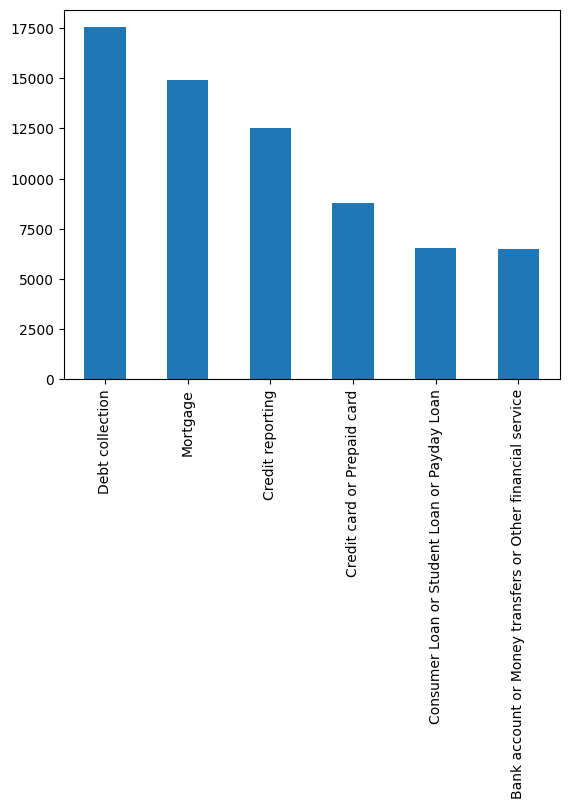

In [16]:
data['product'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [18]:
data['consumer_complaint_narrative'].unique()

array(['XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! \nThey continue to insist I owe them and collection agencies are after me. \nHow can I stop this harassment for a bill I already paid four years ago? \n',
       'Due to inconsistencies in the amount owed that I was told by M & T Bank and the amount that was reported to the credit reporting agencies, I was advised to write a good will letter in order to address the issue and request the negative entry be removed from my credit report all together. I had a vehicle that was stolen and it was declared a total loss by insurance company. The insurance company and the GAP insurancw companypaid the outstanding balance of the loan, but I was told by M & T Bank that there was still a balance due on the loan. In good faith, without having received any proof as to why there was still a balance, I made a partial payment towards the remaining 

In [19]:
data['consumer_complaint_narrative'].nunique()

65646

In [20]:
def print_plot(index):
    x = data[data.index == index][['consumer_complaint_narrative', 'product']].values[0]
    if len(x) > 0:
        print(x[0])
        print('Product:', x[1])

In [21]:
print_plot(190126)

XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! 
They continue to insist I owe them and collection agencies are after me. 
How can I stop this harassment for a bill I already paid four years ago? 

Product: Debt collection


In [22]:
print_plot(318688)

When I vacated apartment to purchase a home, XXXX XXXX ( complex ) charged me for costs associated with maintaining a pet in addition to retaining the {$300.00} deposit. During this time the complex was acquired by XXXX XXXX, a large firm with national apartment complex holdings. I paid the charges in full during the transition from XXXX XXXX to the acquirer, XXXX XXXX but the accounting systems between the XXXX did not account for all the payments made. I contacted XXXX at XXXX XXXX and the matter was resolved after getting harrassing calls and letters from XXXX XXXX, another collection agency. Subsequently and for a long period of time, XXXX XXXX ceased collection efforts on this previously paid debt. Now, recently they have apparently shifted collection efforts to yet another COLLECTION agency Alpha Recovery Corporation ( ARC ), XXXX XXXX XXXX XXXX, XXXX XXXX, XXXX XXXX, CO XXXX. ARC resumed collection activities on this paid obligation, calling my place of business and home and eve

# Pre-Processing 

In [23]:
# convert to lowercase
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].str.lower()

In [24]:
# remove unwanted characters,numbers and 'x'
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].str.replace(r'[^\w\s]+','')

/var/folders/wk/sk318yrn7cgdc9qc0pn7_4740000gn/T/ipykernel_43041/1079958777.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].str.replace(r'[^\w\s]+','')


In [25]:
# remove sequences of uppercase letters with whitespace between them (remove "XXXX" word)
import re
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].astype(str).apply(lambda x: re.sub(r'\bxxxx\b', '', x)) 

In [26]:
# remove numbers
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].str.replace(r'\d+', '') # remove numbers

/var/folders/wk/sk318yrn7cgdc9qc0pn7_4740000gn/T/ipykernel_43041/793719258.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].str.replace(r'\d+', '') # remove numbers


In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulkp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# remove stopwords
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [30]:
# stem words
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()])) 

In [31]:
print_plot(190126)

claim owe year despit proof payment sent cancel check ownpaid invoic continu insist owe collect agenc stop harass bill alreadi paid four year ago
Product: Debt collection


In [32]:
print_plot(318688)

vacat apart purchas home complex charg cost associ maintain pet addit retain deposit time complex acquir larg firm nation apart complex hold paid charg full transit acquir account system account payment made contact matter resolv get harrass call letter anoth collect agenc subsequ long period time ceas collect effort previous paid debt recent appar shift collect effort yet anoth collect agenc alpha recoveri corpor arc co arc resum collect activ paid oblig call place busi home even father home number anoth state written advis ceas collect effort refer correspond well entiti confirm oblig fulli extinguish proceed file claim renter insur time charg would fulli paid insur result fact reimburs moni paid result fail proceed file claim request
Product: Debt collection


In [33]:
# limit the data set to the top 50,000 words
max_words = 50000
# set the max number of words in each complaint at 250
max_len = 250
# This is fixed.
EMBEDDING_DIM = 100

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['consumer_complaint_narrative'])
sequences = tokenizer.texts_to_sequences(data['consumer_complaint_narrative'])

2023-04-14 12:33:56.778495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
# truncate and pad the input sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(sequences, maxlen=max_len)

In [36]:
# print the shape of the input matrix
print('Shape of input matrix:', X.shape)

Shape of input matrix: (66806, 250)


In [37]:
Y = pd.get_dummies(data['product'])
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (66806, 6)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [39]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(53444, 250) (53444, 6)
(13362, 250) (13362, 6)


In [40]:
X.shape[1]

250

# Model Building

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SpatialDropout1D,Dropout
model = Sequential()
model.add(Embedding(max_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
669/669 [==============================] - 494s 739ms/step - loss: 0.9703 - accuracy: 0.6551 - val_loss: 0.6997 - val_accuracy: 0.7652
Epoch 2/10
669/669 [==============================] - 465s 695ms/step - loss: 0.6785 - accuracy: 0.7940 - val_loss: 0.6774 - val_accuracy: 0.8106
Epoch 3/10
669/669 [==============================] - 496s 741ms/step - loss: 0.7142 - accuracy: 0.7820 - val_loss: 0.7879 - val_accuracy: 0.7522
Epoch 4/10
669/669 [==============================] - 511s 763ms/step - loss: 0.6249 - accuracy: 0.8138 - val_loss: 0.5993 - val_accuracy: 0.8251
Epoch 5/10
669/669 [==============================] - 518s 774ms/step - loss: 0.5430 - accuracy: 0.8422 - val_loss: 0.5423 - val_accuracy: 0.8368
Epoch 6/10
669/669 [==============================] - 512s 765ms/step - loss: 0.4425 - accuracy: 0.8705 - val_loss: 0.6459 - val_accuracy: 0.7960
Epoch 7/10
669/669 [==============================] - 547s 818ms/step - loss: 0.3830 - accuracy: 0.8900 - val_loss: 0.4907 -

In [50]:
accr=model.evaluate(X_test, Y_test, batch_size=10, verbose=1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1337/1337 [==============================] - 52s 39ms/step - loss: 0.5320 - accuracy: 0.8478
Test set
  Loss: 0.532
  Accuracy: 0.848


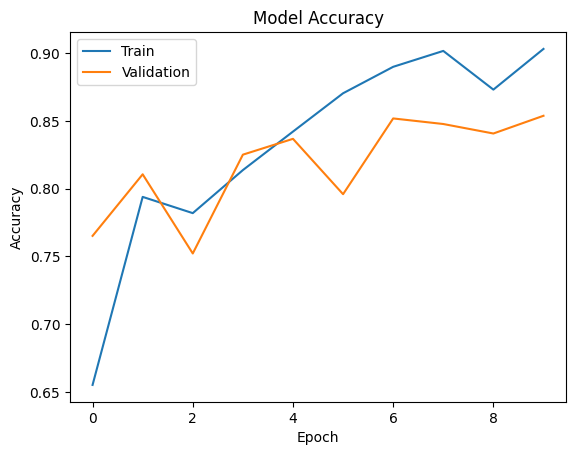

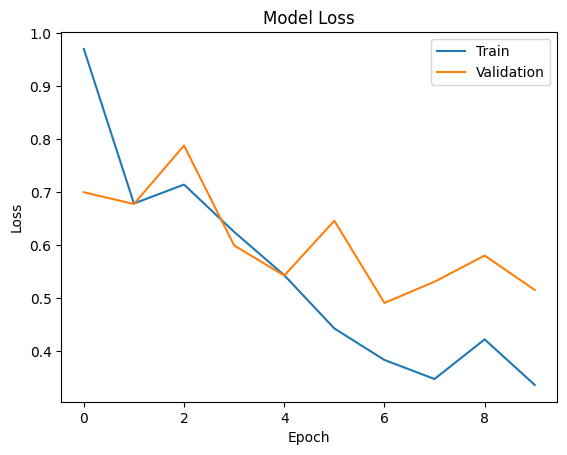

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [53]:
y_pred=model.predict(X_test)
#y_pred

418/418 [==============================] - 20s 48ms/step


In [54]:
y_test_labels = Y_test.idxmax(axis=1)

In [55]:
y_pred_labels = pd.Series(y_pred.argmax(axis=1)).apply(lambda x: Y_test.columns[x])

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))

                                                            precision    recall  f1-score   support

Bank account or Money transfers or Other financial service       0.87      0.74      0.80      1326
              Consumer Loan or Student Loan or Payday Loan       0.74      0.76      0.75      1314
                               Credit card or Prepaid card       0.82      0.80      0.81      1783
                                          Credit reporting       0.84      0.85      0.85      2502
                                           Debt collection       0.83      0.87      0.85      3496
                                                  Mortgage       0.94      0.93      0.94      2941

                                                  accuracy                           0.85     13362
                                                 macro avg       0.84      0.83      0.83     13362
                                              weighted avg       0.85      0.85      0.85     1336

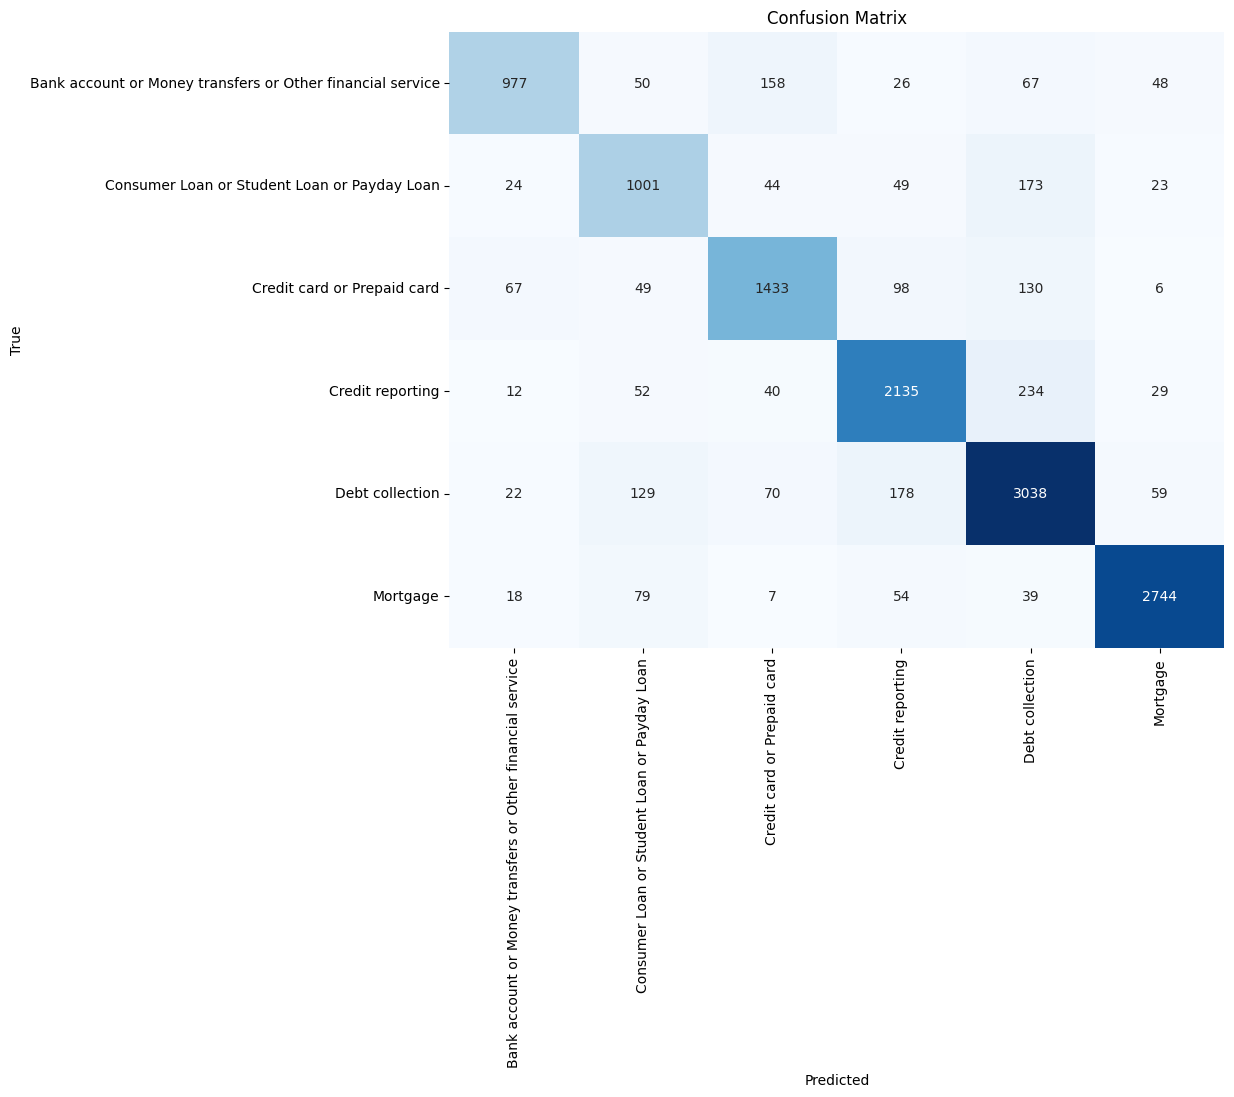

In [57]:
import seaborn as sns
cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=Y_test.columns, yticklabels=Y_test.columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# use the model to predict the product category for new consumer complaints
new_complaints = ["I recently noticed a charge of $100 on my credit card statement from a merchant named XYZ that I did not authorize. I contacted the credit card company's customer service, but they were unable to resolve the issue and provide a refund. I am extremely dissatisfied with the situation and demand a refund for the disputed amount"]

In [61]:
new_sequences = tokenizer.texts_to_sequences(new_complaints)
new_padded = pad_sequences(new_sequences, maxlen=250)
predictions = model.predict(new_padded)
labels=['Mortgage','Debt collection','Credit reporting','Credit card or Prepaid card','Bank account or service','Consumer Loan or Student Loan or Payday Loan','Money transfers','Other financial service']
for i, prediction in enumerate(predictions):
    print('Complaint: %s\nPredicted Product: %s\n' % (new_complaints[i], labels[np.argmax(prediction)]))

1/1 [==============================] - 0s 66ms/step
Complaint: I recently noticed a charge of $100 on my credit card statement from a merchant named XYZ that I did not authorize. I contacted the credit card company's customer service, but they were unable to resolve the issue and provide a refund. I am extremely dissatisfied with the situation and demand a refund for the disputed amount
Predicted Product: Credit reporting

